In [14]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns
sns.set_style('white')

import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

In [15]:
def emd(x, nIMF = 3, stoplim = .001):
    """Perform empirical mode decomposition to extract 'niMF' components out of the signal 'x'."""
    
    r = x
    t = np.arange(len(r))
    imfs = np.zeros(nIMF,dtype=object)
    for i in range(nIMF):
        r_t = r
        is_imf = False
        
        while is_imf == False:
            # Identify peaks and troughs
            pks = sp.signal.argrelmax(r_t)[0]
            trs = sp.signal.argrelmin(r_t)[0]
            
            # Interpolate extrema
            pks_r = r_t[pks]
            fip = sp.interpolate.InterpolatedUnivariateSpline(pks,pks_r,k=3)
            pks_t = fip(t)
            
            trs_r = r_t[trs]
            fitr = sp.interpolate.InterpolatedUnivariateSpline(trs,trs_r,k=3)
            trs_t = fitr(t)
            
            # Calculate mean
            mean_t = (pks_t + trs_t) / 2
            mean_t = _emd_complim(mean_t, pks, trs)
            
            # Assess if this is an IMF (only look in time between peaks and troughs)
            sdk = _emd_comperror(r_t, mean_t, pks, trs)
            
            # if not imf, update r_t and is_imf
            if sdk < stoplim:
                is_imf = True
            else:
                r_t = r_t - mean_t
                
        
        imfs[i] = r_t
        r = r - imfs[i] 
        
    return imfs


def _emd_comperror(h, mean, pks, trs):
    """Calculate the normalized error of the current component"""
    samp_start = np.max((np.min(pks),np.min(trs)))
    samp_end = np.min((np.max(pks),np.max(trs))) + 1
    return np.sum(np.abs(mean[samp_start:samp_end]**2)) / np.sum(np.abs(h[samp_start:samp_end]**2))


def _emd_complim(mean_t, pks, trs):
    samp_start = np.max((np.min(pks),np.min(trs)))
    samp_end = np.min((np.max(pks),np.max(trs))) + 1
    mean_t[:samp_start] = mean_t[samp_start]
    mean_t[samp_end:] = mean_t[samp_end]
    return mean_t

In [78]:
minN = 7000
maxN = 9000
#x = np.load('./exampledata.npy')
#x = pd.read_csv('data.csv', parse_dates=True, index_col='bulan')
x = pd.read_csv('data2.csv', header=None)
#x = np.array([1, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 3, 8, 18, 5, 9, 6, 4, 12, 12, 16, 23, 22, 20, 22, 33, 46, 38, 27, 26, 34, 38, 33, 23, 28, 23, 44, 24, 31, 35, 29, 30, 36, 53, 60, 59, 58, 50, 77, 46, 40, 43, 30, 60, 64, 116, 72, 94, 100, 73, 82, 62, 53, 43, 50, 47, 54, 46, 50, 39, 70, 69, 85, 43, 49, 55, 33, 27, 35, 103, 154, 79, 21, 28, 37, 24, 28, 27, 18, 26, 31, 90, 132, 43, 26, 28, 26, 23, 26, 31, 31, 25, 7, 26, 19, 8, 13, 22, 11, 5, 9, 13, 13, 13, 13, 8, 6, 5, 13, 10, 4, 17, 6, 8, 5, 4, 22, 61, 54, 23, 19, 9, 5, 28, 25, 133])
#x = x[minN:maxN+1]
#t = np.arange(0,len(x)*.001,.001)

In [70]:
#dfx = pd.DataFrame(x)
#dfx

In [76]:
#x

In [79]:
imfs = emd(x, nIMF = 5)

TypeError: __call__() got an unexpected keyword argument 'nIMF'

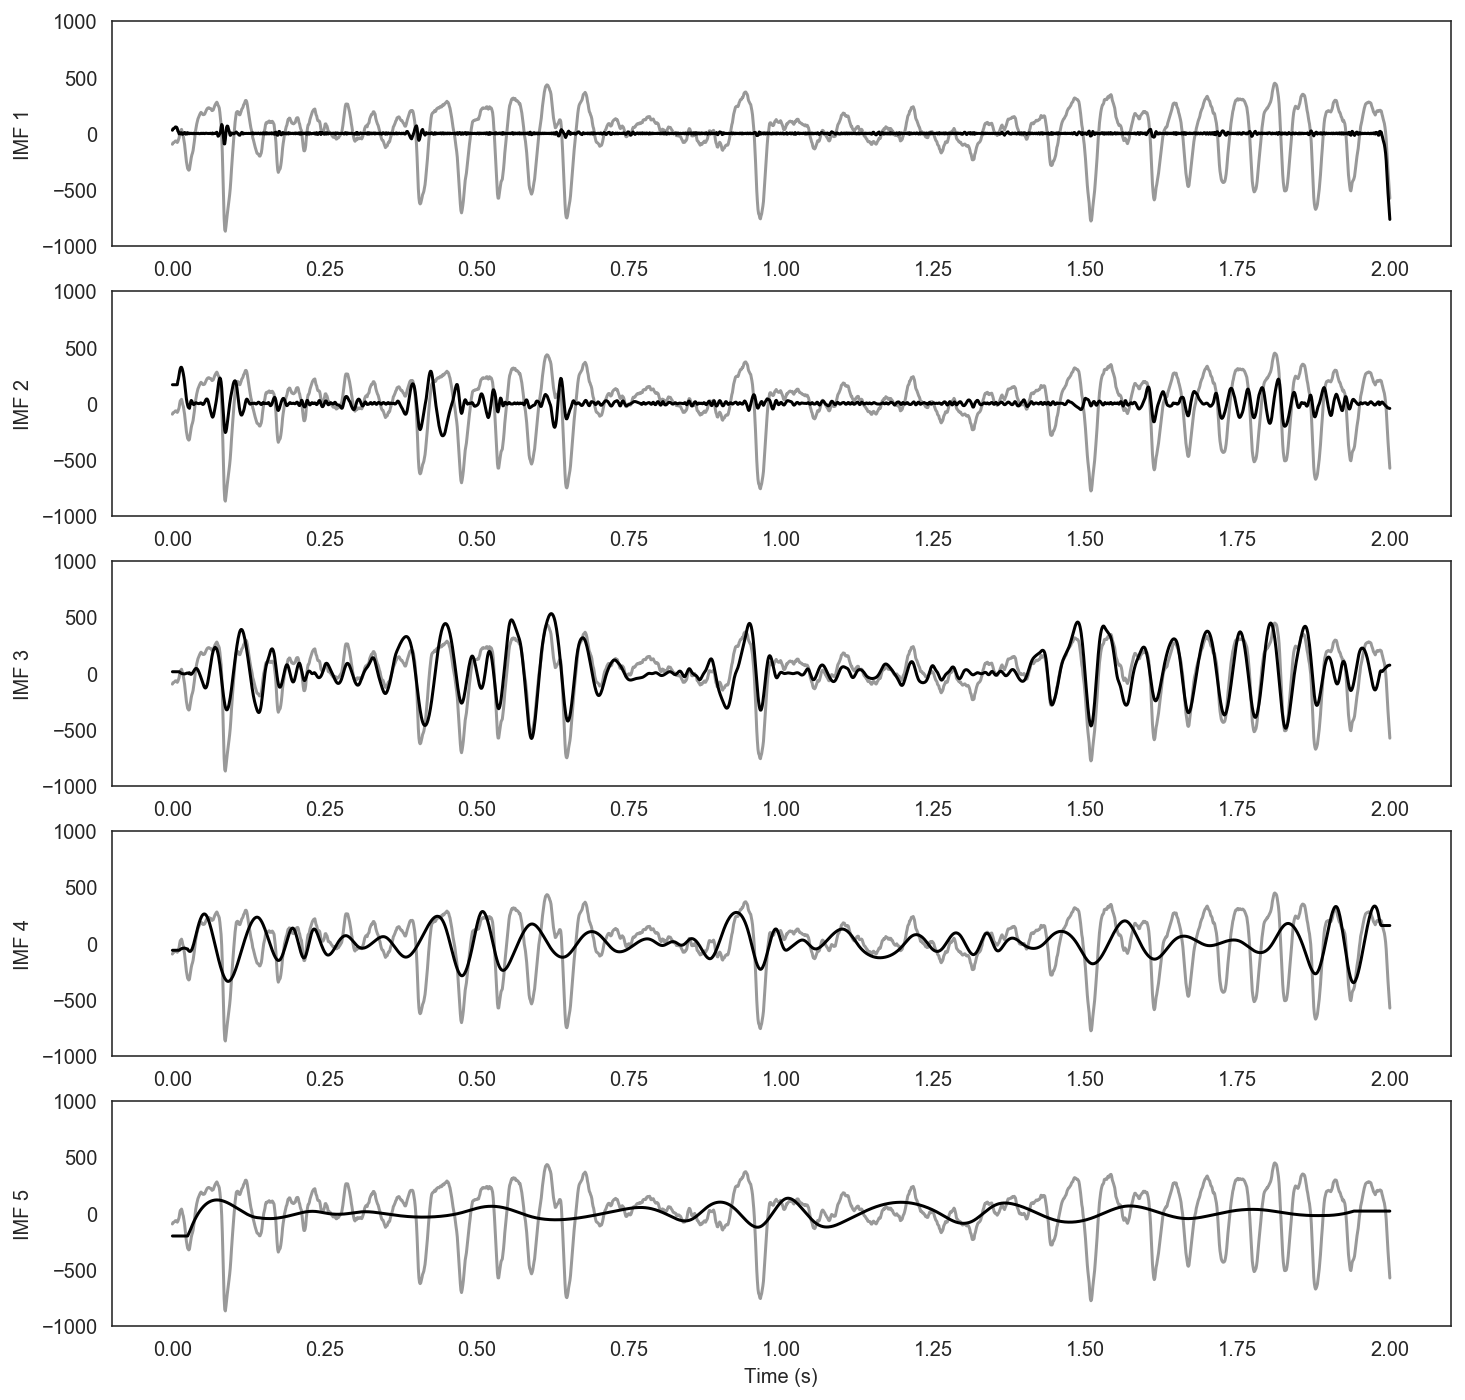

In [18]:


plt.figure(figsize=(12,12))
for i in range(len(imfs)):
    plt.subplot(len(imfs),1,i+1)
    plt.plot(t,x,color='0.6')
    plt.plot(t,imfs[i],'k')
    plt.ylim([-1000,1000])
    plt.ylabel('IMF '+np.str(i+1))
    if i == len(imfs)-1:
        plt.xlabel('Time (s)')



# ################

In [20]:
!pip install EMD-signal

  Stored in directory: C:\Users\r3f1n\AppData\Local\pip\Cache\wheels\61\6d\83\90b0c3d2c271da2c4850731e894798c98f8dbedbac74e8eff0
  Stored in directory: C:\Users\r3f1n\AppData\Local\pip\Cache\wheels\6a\0c\53\ea8dd63608f75c1e7a64d5c5ce5d1e6d04f15ae8a6fce4c2a0
  Stored in directory: C:\Users\r3f1n\AppData\Local\pip\Cache\wheels\59\b1\91\f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Stored in directory: C:\Users\r3f1n\AppData\Local\pip\Cache\wheels\47\10\7b\0e916f6246fe7cf7d3acd25a6d273ecf3f97888cea073a8ac2
  Stored in directory: C:\Users\r3f1n\AppData\Local\pip\Cache\wheels\96\20\ac\9f1d164f7d81787cd6f4401b1d05212807d021fbbbcc301b82
Successfully built pathos ppft dill pox multiprocess


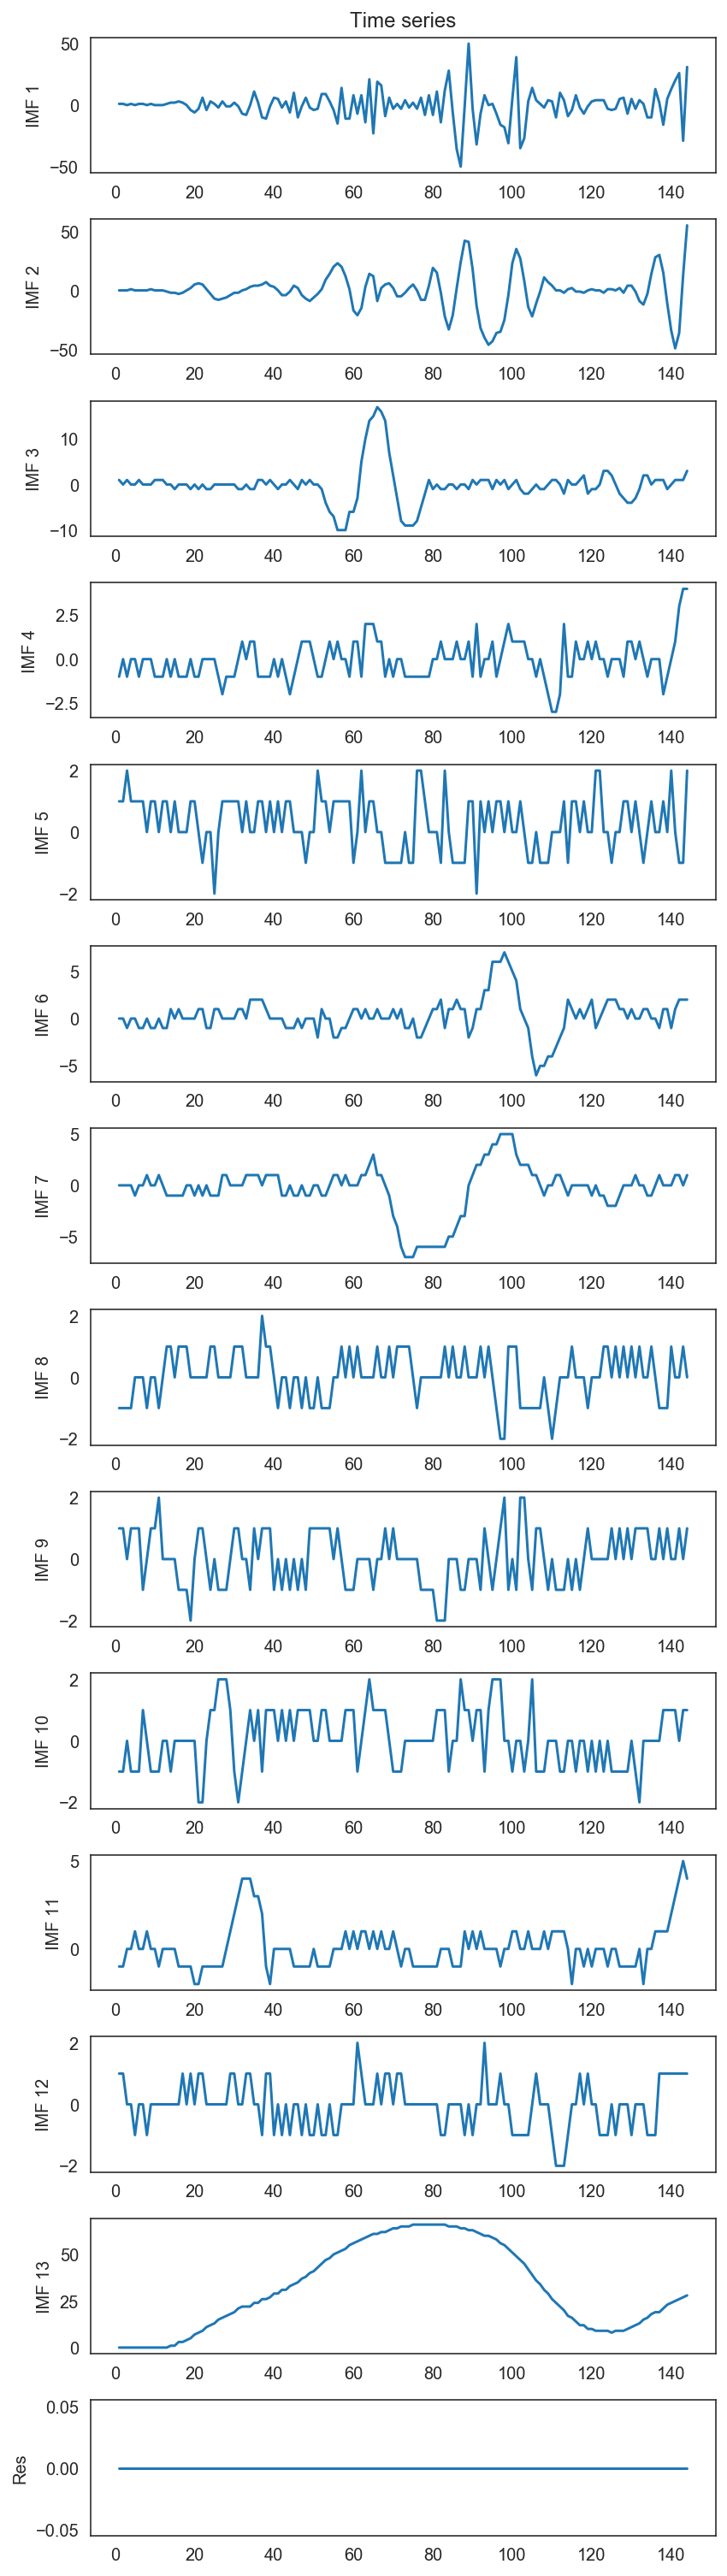

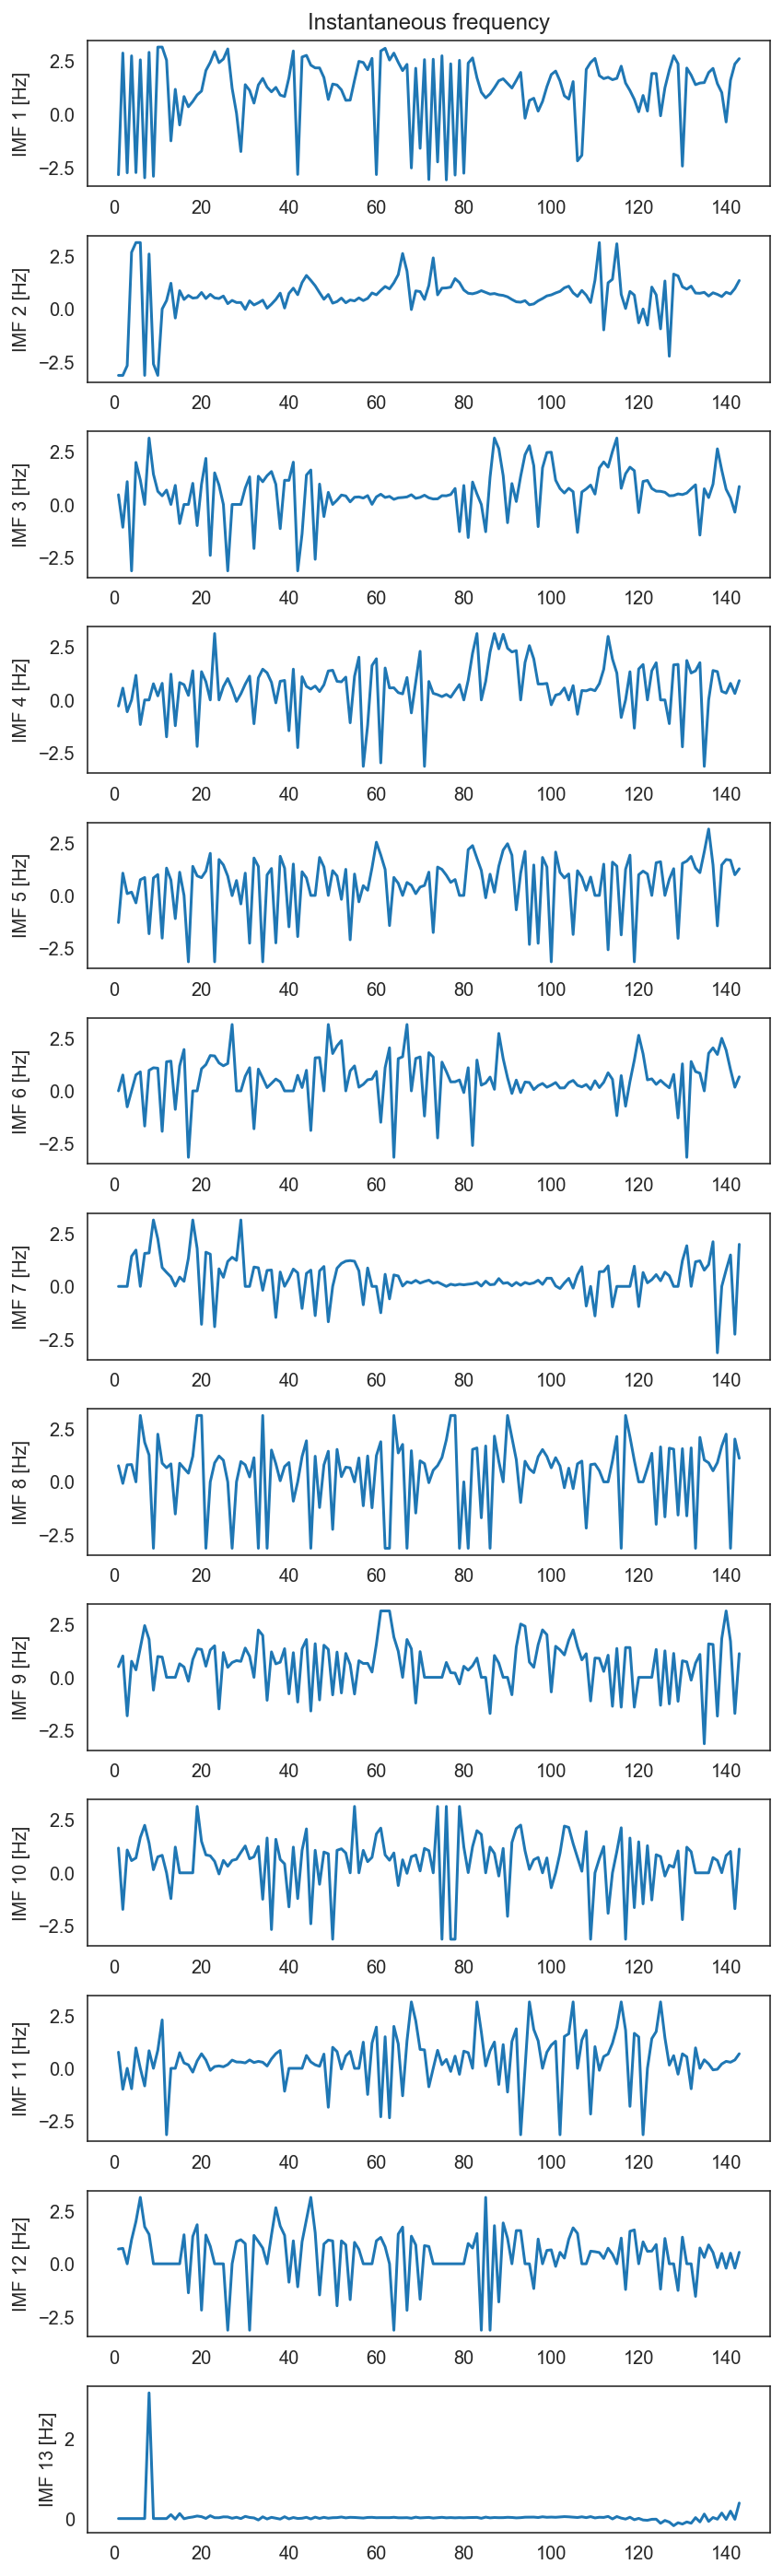

In [89]:


import numpy as np
from PyEMD import EMD, Visualisation
import pandas as pd

t = np.arange(1, 145, 1)
#S = np.sin(13*t + 0.2*t**1.4) - np.cos(3*t)

# Extract imfs and residue
# In case of EMD
series = pd.read_csv('data.csv', header=0, parse_dates=[0], index_col=0, delimiter=",")
seri = np.array(series["#freq"])
#ser = pd.Series(series["#freq"]).array

emd = EMD()
emd.emd(seri)
imfs, res = emd.get_imfs_and_residue()

# In general:
#components = EEMD()(S)
#imfs, res = components[:-1], components[-1]

vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t=t, include_residue=True)
vis.plot_instant_freq(t, imfs=imfs)
vis.show()  